In [32]:
#Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding

In [33]:
df= pd.read_pickle('../datos/cnt/04_cnt-no-norm.pickle')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,985
1,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,801
2,invierno,0,1,no festivo,3,laborable,1,8.050924,9.47025,43.7273,16.636703,1349
3,invierno,0,1,no festivo,4,laborable,1,8.200000,10.60610,59.0435,10.739832,1562
4,invierno,0,1,no festivo,5,laborable,1,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
df.dtypes

season        category
yr               int64
mnth             int64
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

`Para poder codificar las variables categoricas vamos a ir analizando una a una para ver que metodo aplicaremos, segun tenga orden o no.`

---

### SEASON

In [35]:
# Realizamos un groupby que sume los registros de la columna registered por estacion.

estacion = df.groupby('season')['cnt'].sum()
estacion= pd.DataFrame(estacion).reset_index()
estacion

,season,cnt
0,invierno,469514
1,otoño,841613
2,primavera,918589
3,verano,1061129


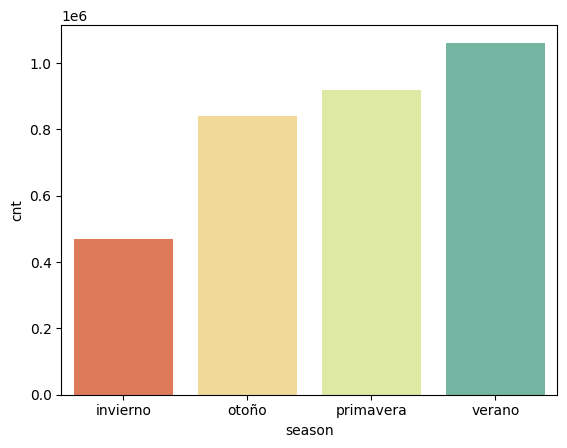

In [36]:
sns.barplot(
        data = estacion,
        x = 'season',
        y = 'cnt',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna season TIENE ORDEN, por lo que le daremos menor peso al invierno y mayor al verano`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`


In [37]:
mapa_season = {'invierno':0, 'primavera':1, 'otoño':1, 'verano':2} 

In [38]:
df['season'] = df['season'].map(mapa_season)

---

### HOLIDAY

In [39]:
holiday = df.groupby('holiday')['cnt'].sum()
holiday = pd.DataFrame(holiday).reset_index()
holiday

,holiday,cnt
0,festivo,81839
1,no festivo,3209006


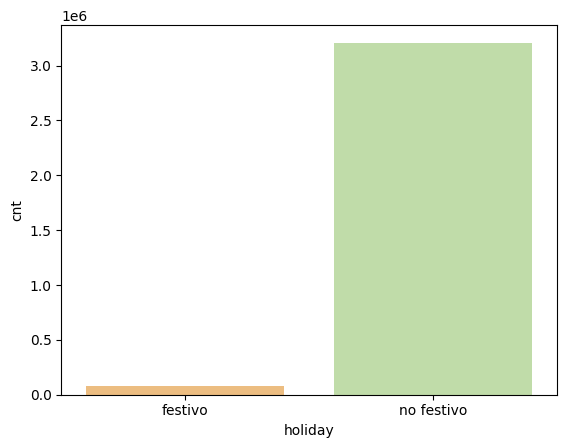

In [40]:
sns.barplot(
        data = holiday,
        x = 'holiday',
        y = 'cnt',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna holiday TIENE ORDEN, por lo que le daremos menor peso a festivos y mayor a no festivo`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

# Aumentamos el peso de no festivo con respecto a los registrados, segun vemos el peso en esta gráfica

In [41]:
mapa_holiday = {'festivo':0, 'no festivo':2} 

In [42]:
df['holiday'] = df['holiday'].map(mapa_holiday)

In [43]:
df.sample(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
420,0,1,2,2,1,laborable,1,11.924153,12.78375,39.5833,28.250014,2732
648,1,1,10,2,5,laborable,1,17.835000,21.55835,46.3333,12.166932,7570


---

## WEEKDAY

In [44]:
semana = df.groupby('weekday')['cnt'].sum()
semana = pd.DataFrame(semana).reset_index()
semana

,weekday,cnt
0,1,447281
1,2,448822
2,3,462276
3,4,487923
4,5,478132
5,6,481176
6,7,485235


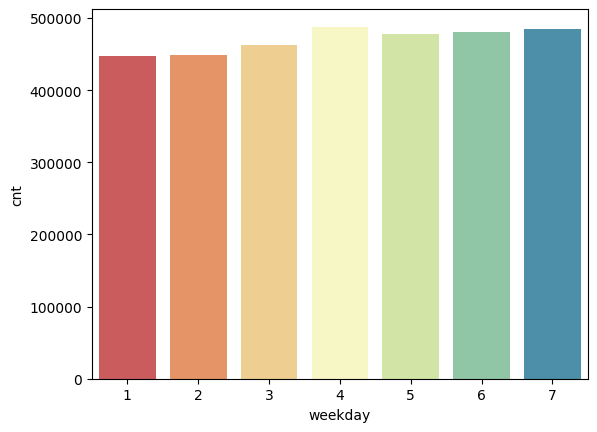

In [45]:
sns.barplot(
        data = semana,
        x = 'weekday',
        y = 'cnt',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weekday TIENE ORDEN, por lo que le daremos menor peso a 1(Lunes) y 7(Domingo) y mayor a 4(Jueves) y 5(Viernes).`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

# Cambiamos el peso de los dias de la semana con respecto a registrados

In [46]:
mapa_weekday = {7:1, 
                1:0,
                2:0, 
                3:0,
                4:2, 
                5:1,
                6:1}

In [47]:
df['weekday'] = df['weekday'].map(mapa_weekday)

---

## WEATHERSIT

In [48]:
clima = df.groupby('weathersit')['cnt'].sum()
clima = pd.DataFrame(clima).reset_index()
clima

,weathersit,cnt
0,1,2257952
1,2,995024
2,3,37869


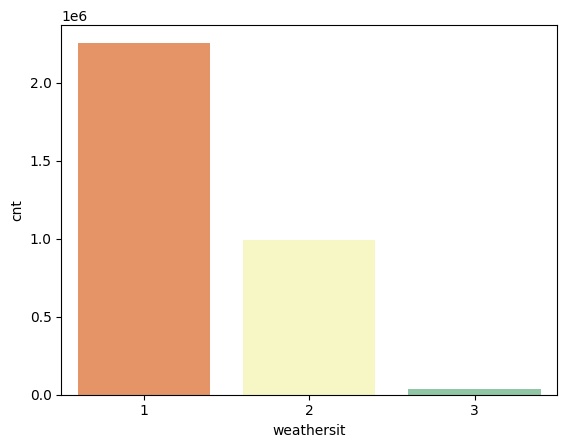

In [49]:
sns.barplot(
        data = clima,
        x = 'weathersit',
        y = 'cnt',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weathersit TIENE ORDEN, por lo que le daremos menor peso a 3  y mayor 1.`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [50]:
mapa_weather = {3:0, 2:1, 1:2}

In [51]:
df['weathersit'] = df['weathersit'].map(mapa_weather)

---

In [52]:
df.sample(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
47,0,0,2,2,1,finde,2,17.869153,21.4329,50.5,15.416968,2475
405,0,1,2,2,1,finde,1,11.514153,14.6779,54.0,7.834243,3831


In [53]:
df.drop('workingday', axis = 1, inplace= True)

In [54]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,1,2,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,2,0,2,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,2,2,2,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,2,1,2,9.305237,11.46350,43.6957,12.522300,1600


---

#Month

In [55]:
mes = df.groupby('mnth')['cnt'].sum()
mes = pd.DataFrame(mes).reset_index()
mes

,mnth,cnt
0,1,134933
1,2,149518
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


In [56]:
df.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [57]:
df.mnth.dtype

dtype('int64')

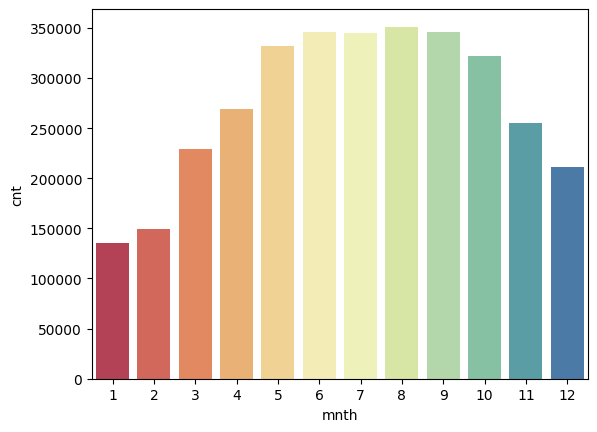

In [58]:
sns.barplot(
        data = mes,
        x = 'mnth',
        y = 'cnt',
        #alpha = 0.2,
        palette = 'Spectral');

In [59]:
mapa_mes = {1:0, 2:0, 3:1, 4:2, 5:3, 6:3, 7:3, 8:3, 9:3, 10:3, 11:2, 12:1}

In [60]:
df['mnth'] = df['mnth'].map(mapa_mes)

In [61]:
df.mnth.unique()

array([0, 1, 2, 3])

In [62]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,2,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,2,0,2,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,2,2,2,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,2,1,2,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:

'''def one_hot_encoder_one(df,columna,keep_first=True):
    
    # iniciamos el método de OneHot Encoder
    oh = OneHotEncoder()
    
    # hacemos la codificación de los datos para la variable dada 
    transformados = oh.fit_transform(df[[columna]])
    
    # convertimos nuestro array con la codificación hecha en un dataframe
    oh_df = pd.DataFrame(transformados.toarray())
    
    # el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
    oh_df.columns = oh.get_feature_names()
    
    # concatenamos el dataframe original con el dataframe que acabamos de crear
    final = pd.concat([df,oh_df],axis=1)
    
    # eliminamos la columna original 
    final.drop(columna, axis = 1,  inplace = True)
    return final'''

In [ ]:
#df = one_hot_encoder_one(df, "mnth")

In [ ]:
df.head(2)

,season,yr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_9,x0_10,x0_11,x0_12
0,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,0,1,14.902598,17.68695,69.6087,16.652113,801,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

In [63]:
df.to_pickle('../datos/cnt/05-cnt_encoding.pickle')

In [64]:
df.to_csv('../datos/cnt/05-cnt_encoding.csv')